# <font color='DarkBlue'> <center> SMS SPAM HAM DETECTION

**`Problem-Statement`**:
The increasing prevalence of SMS spam poses significant challenges to users and service providers, leading to annoyance, privacy concerns, and potential security threats. In this context, the objective is to develop a robust and scalable machine learning solution for accurately identifying and filtering spam messages from legitimate ones (ham) in SMS communications.

- The project aims to address several key challenges, including:

`Data Diversity`: 
- The model should be trained on a diverse dataset that encompasses a wide range of languages, message formats, and spam tactics to ensure its effectiveness across different regions and user demographics.

`High Accuracy`: 
- Achieving a high level of accuracy in spam detection is paramount to minimize false positives (flagging legitimate messages as spam) and false negatives (missing actual spam messages). The model should strive for precision and recall rates that exceed industry standards.

`Real-Time Processing`: 
- As SMS communication often requires real-time processing, the solution should be capable of swiftly analyzing incoming messages to provide timely spam detection without significant delays.

`Scalability`: 
- The system should be scalable to handle large volumes of SMS traffic, ensuring efficient performance even during peak usage periods without compromising on accuracy.

`Adaptability and Generalizability`: 
- Given the evolving nature of spam techniques, the model should be adaptable to new spamming tactics and generalizable across different platforms and devices, including smartphones, feature phones, and messaging apps.

`User Experience Improvement`: 
- By effectively filtering out spam messages, the project aims to enhance the overall user experience, reduce interruptions, and build trust in SMS-based communication platforms.

`Privacy and Security`: 
- The solution should prioritize user privacy by handling sensitive SMS content securely and ensuring that spam detection processes do not compromise data confidentiality.

Overall, the goal of this project is to deploy a sophisticated SMS spam detection system that not only meets the stringent accuracy and performance requirements but also contributes to a safer, more streamlined, and user-friendly SMS communication environment.

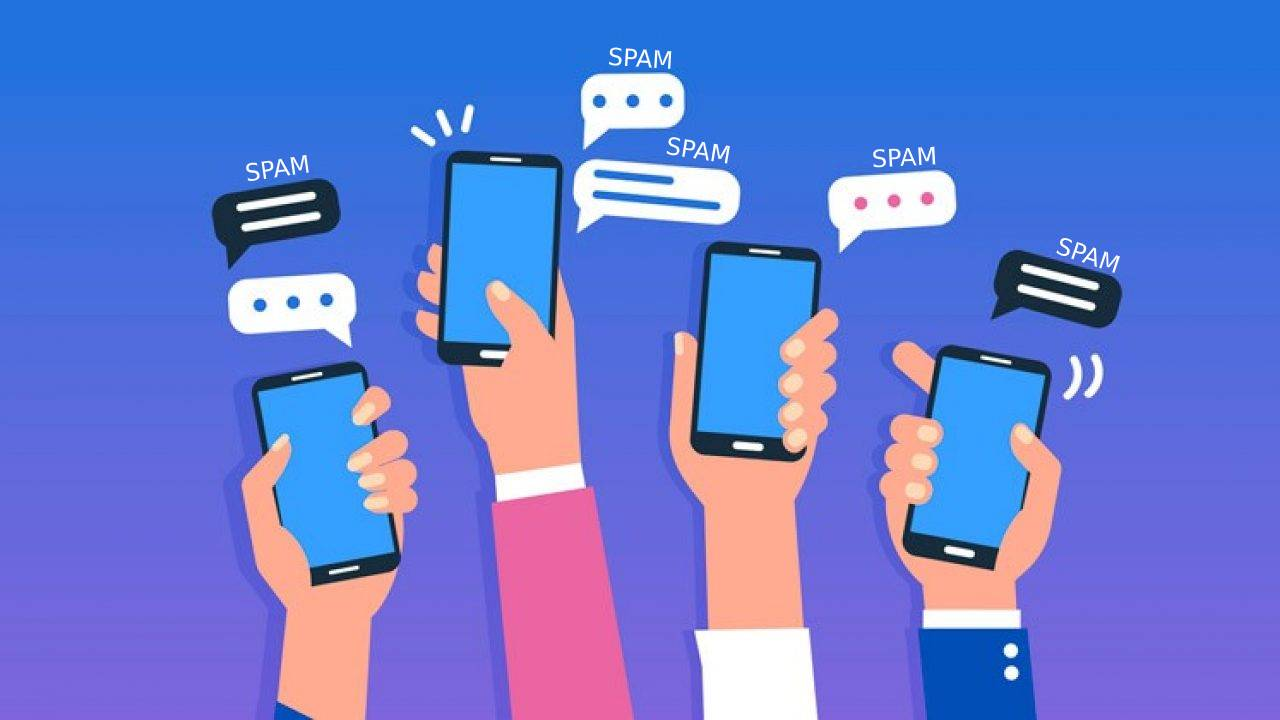


## Importing required libraries

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
sms = pd.read_csv(r"C:\Users\admin\Downloads\SMS_SPAM\spam.csv",encoding='ISO-8859-1')

In [3]:
# checking the 10 sample rows
sms.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3735,ham,Hows the street where the end of library walk is?,NaN,NaN,NaN
3996,spam,Bored housewives! Chat n date now! 0871750.77....,NaN,NaN,NaN
4073,ham,A lot of this sickness thing going round. Take...,NaN,NaN,NaN
3367,ham,"Hey elaine, is today's meeting still on?",NaN,NaN,NaN
2353,spam,Please CALL 08712402902 immediately as there i...,NaN,NaN,NaN
594,ham,I met you as a stranger and choose you as my f...,NaN,NaN,NaN
1959,ham,Howz that persons story,NaN,NaN,NaN
4749,ham,"If you're still up, maybe leave the credit car...",NaN,NaN,NaN
71,ham,Finished class where are you.,NaN,NaN,NaN
2206,spam,"URGENT! Your mobile No 07xxxxxxxxx won a å£2,0...",NaN,NaN,NaN


In [4]:
# checking the size of the data
sms.shape

(5572, 5)

In [5]:
## checking if any null values exist or not
sms.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
## checking the data types of the columns
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Cleaning the Data 

In [7]:
# dropping the unnecessary columns
sms.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
# renaming the columns
sms.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [9]:
# importing the Label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
# encoding the target variable into binary values
sms['Target'] = encoder.fit_transform(sms['Target'])

In [11]:
sms.isnull().sum()

Target    0
Text      0
dtype: int64

In [93]:
## checking for duplicate values
sms.duplicated().sum()

0

In [14]:
# dropping the duplicates
sms = sms.drop_duplicates(keep='first')

In [15]:
# after dropping shape of the data
sms.shape

(5169, 2)

### Exploring the data and visualizing

In [94]:
# value counts of the target variable
sms['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

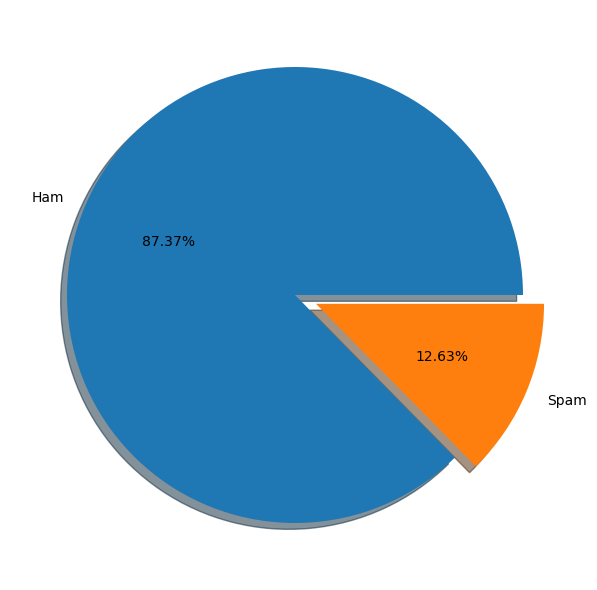

In [96]:
# lets import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# lets adjust the figure
plt.figure(figsize=(8,6))

# plotting the pie chart
plt.pie(sms['Target'].value_counts(),shadow=True,
        labels=['Ham','Spam'],explode=(0,0.1),autopct='%0.2f%%')

plt.tight_layout()
plt.show()

**`Observation`** : 
- Data is very much imbalanced,
- Ham messages are of 87.37 percentage 
- Spam messages are just 12.63%
- This imbalance can cause inaccurate results, we'll be using precison for our Model Evaluation

In [19]:
# importing nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
## no of chars used in the Text
sms['num_characters'] = sms['Text'].apply(len)

In [21]:
## num of words used in Text
sms['num_words'] = sms['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [22]:
# number of sentences used in the text
sms['num_sentence'] = sms['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [97]:
# exploring the data statistically
sms.describe()

,Target,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


### Ham

In [25]:
sms[sms['Target'] == 0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


### spam

In [27]:
sms[sms['Target'] == 1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


**spam messages are usually larger than the normal messages**

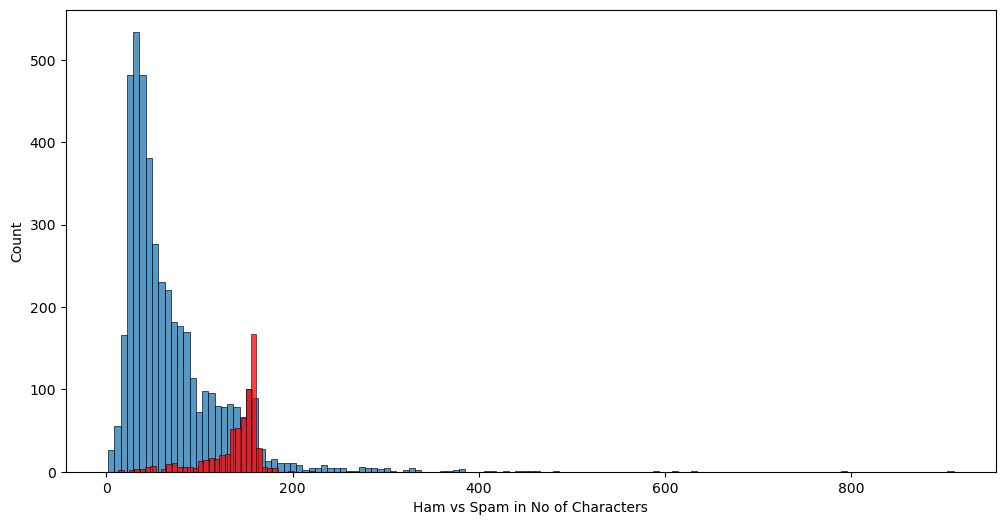

In [30]:
# adjusting the figure size
plt.figure(figsize=(12,6))

#plotting the histplot for the ham and spam 
sns.histplot(sms[sms['Target']==0]['num_characters'])
sns.histplot(sms[sms['Target']==1]['num_characters'],color='red')
plt.xlabel('Ham vs Spam in No of Characters') #labelling the X-axis
plt.show()

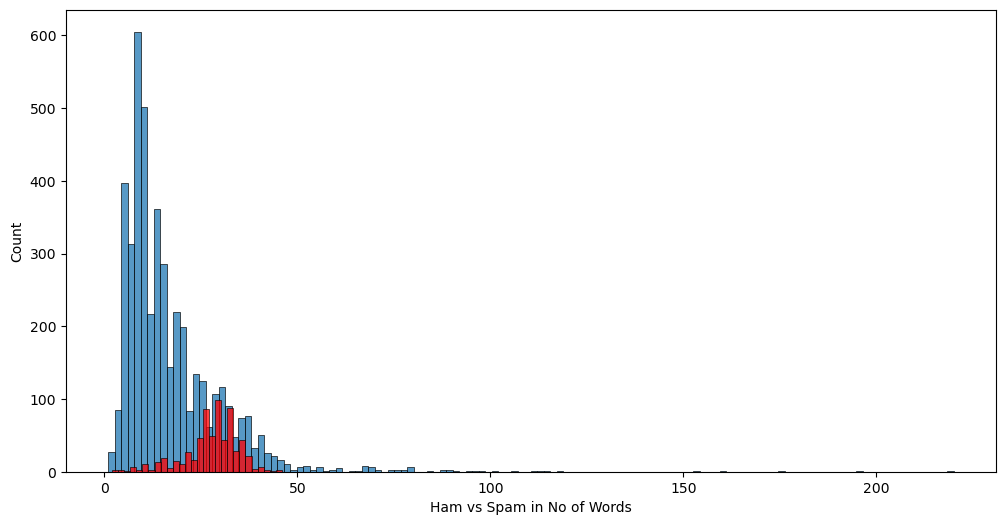

In [31]:
# adjusting the figure size
plt.figure(figsize=(12,6))

#plotting the histplot for the ham and spam 
sns.histplot(sms[sms['Target']==0]['num_words'])
sns.histplot(sms[sms['Target']==1]['num_words'],color='red')
plt.xlabel('Ham vs Spam in No of Words')#labelling the X-axis
plt.show()

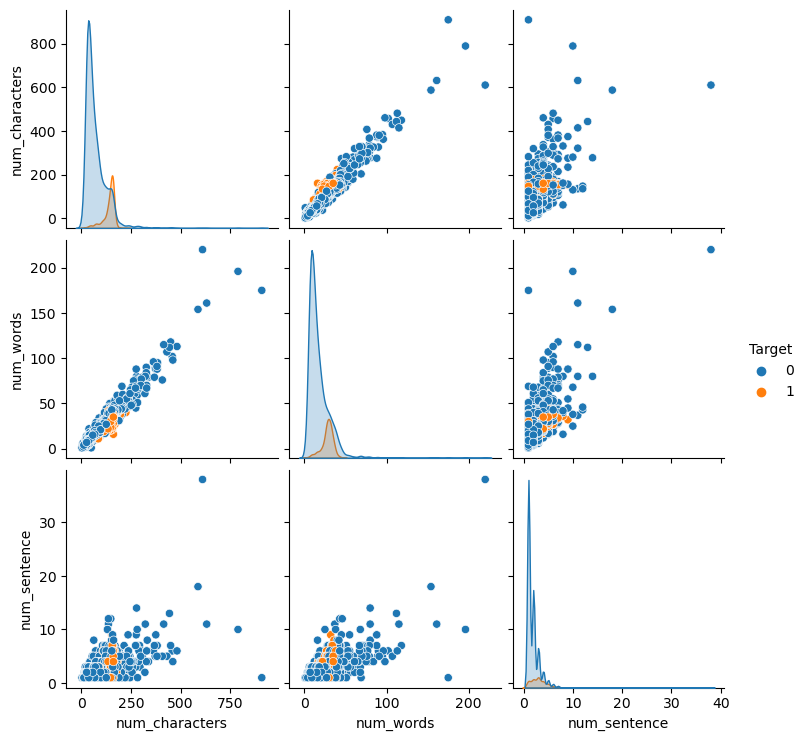

In [32]:
## plotting the pariplot to see the relation
sns.pairplot(sms,hue='Target')

<Axes: >

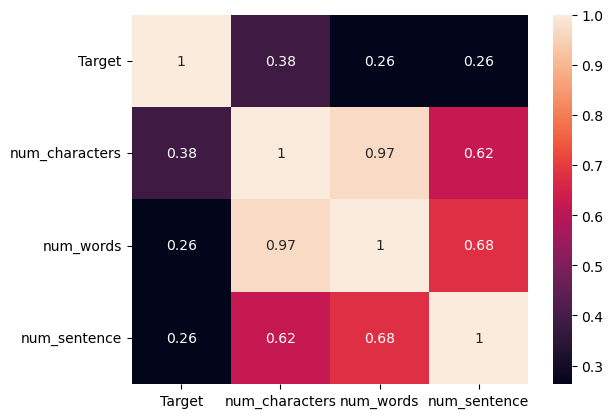

In [34]:
# plotting the heatmap 
sns.heatmap(sms.corr(numeric_only=True),annot=True)

### Data Preprocessing

* Lower Case
* Tokenization
* Removing Spl Characters
* Removing Stop Words and Punctuation
* Stemming

In [35]:
# downloading the stop words
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
# english stop words
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
# importing the string for removing punctuation
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
# importing the porter stemmer for stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [39]:
# sample stemming
ps.stem("Singing")

'sing'

In [40]:
# programming a function which does stemmming
def transform(text):
    text = text.lower() ## step:1 Lower case
    text = nltk.word_tokenize(text) # conerting each words as tokens
    
    y = [] # assigning them into variable Y which has an empty list
    for i in text:  ## for each tokens in text column
        if i.isalnum():  # condition to check any special characters
            y.append(i)  # appending them into y
            
    text = y[:] # assigining the y to orginal text
    y.clear() # clearing out the contents inside the Y
    
    for i in text: # again loop for each tokens inside the text
        if i not in stopwords.words('english') and i not in string.punctuation: # condition to check stopwords
            y.append(i) # appending them to Y                                   # and punctuation
            
    text = y[:] 
    y.clear()
    
    for i in text:
        y.append(ps.stem(i)) # stemming the each token
        
    return " ".join(y) # returning them 

In [41]:
# sample text
transform("I Love the NLTK model.!! Because it is $o cool, it **Literally** is the best ## library")

'love nltk cool liter best librari'

In [42]:
# sample text
transform("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [43]:
# sample text
sms['Text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [44]:
# calling the function and applying that to text column
sms['transformed_text'] = sms['Text'].apply(transform)

In [45]:
# checking the first 5 rows
sms.head()

,Target,Text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
# importing the wordcloud for visualizing
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=500,min_font_size=10,background_color='black')

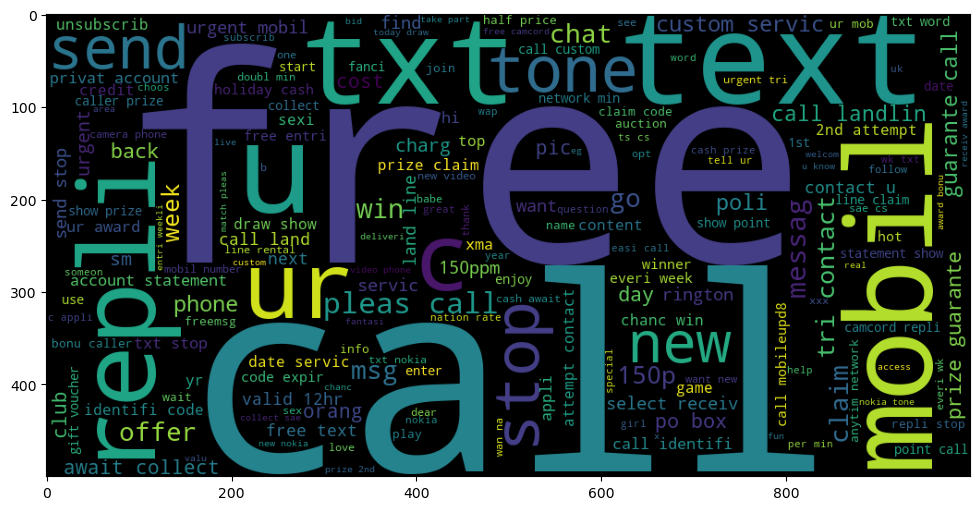

In [98]:
# visuaizing the words in Spam Text
spam = wc.generate(sms[sms['Target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam)
plt.show()

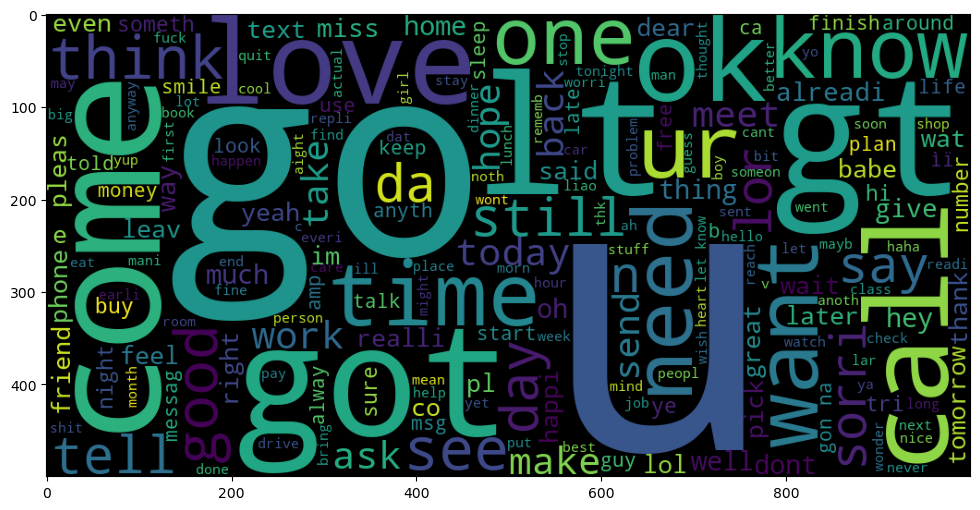

In [99]:
# # visuaizing the words in Normal Text
ham = wc.generate(sms[sms['Target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham)
plt.show()

In [56]:
# splitting the sentences into words for checking the top most used words in the text
spam_corpus = []
for msg in sms[sms['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [57]:
len(spam_corpus)

9939

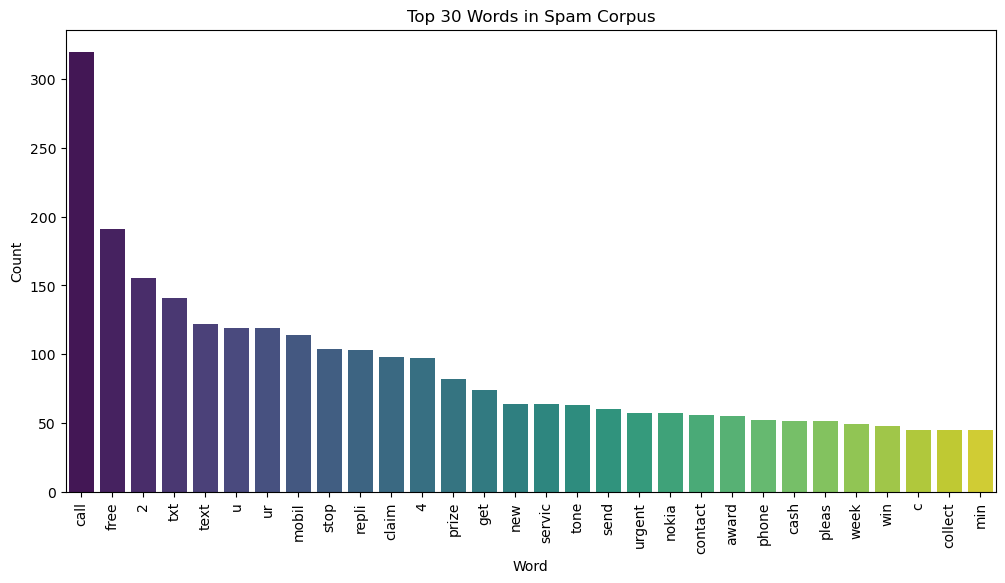

In [58]:
# importing the counter 
from collections import Counter
df_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count']) # Most common 30 words

#adjusting the figure size for better visibility
plt.figure(figsize=(12, 6))
# plotting the barplot
sns.barplot(x='Word', y='Count', data=df_counts, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 30 Words in Spam Corpus')
plt.show()

In [59]:
# splitting the sentences into words for checking the top most used words in the text
ham_corpus = []
for msg in sms[sms['Target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

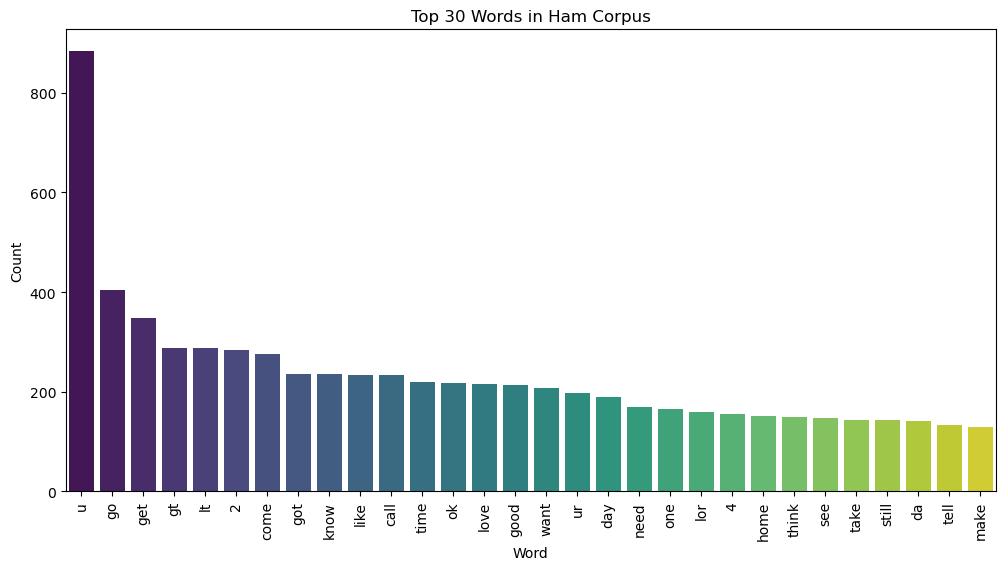

In [60]:
# Most common 30 words in Normal Text
df_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])

# adjusting the figure size for better visibility
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Count', data=df_counts, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 30 Words in Ham Corpus')
plt.show()

### Model Building

In [61]:
# importing the countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [62]:
# converting the textual data into numerical data
X = cv.fit_transform(sms['transformed_text']).toarray()

In [63]:
# printing the shape
X.shape

(5169, 6708)

In [64]:
Y = sms['Target'].values

In [65]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [66]:
# splitting the data into training data and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

## Naive Bayes
- Usually experts say Naive Bayes works best on the Textual Data, we are going to import all three types of the Naive Bayes and train them, we will choose the best among the three

In [67]:
# importing Gaussian, Multinomial, Bernaulli Naive Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# creating an object of them
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

### Training and evaluating GaussianNB

In [68]:
# training the gaussianNB
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)

# printing the metrics
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


### Training and evaluating MultiNomialNB

In [69]:
# training the MultiNomialNB
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)

# printing the metric
print(round(accuracy_score(y_test,y_pred2),ndigits=2))
print(confusion_matrix(y_test,y_pred2))
print(round(precision_score(y_test,y_pred2),ndigits=2))

0.96
[[871  25]
 [ 12 126]]
0.83


### Training and evaluating BernaulliNB

In [70]:
# training the BernoulliNB
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)

# printing the metric
print(round(accuracy_score(y_test,y_pred3),ndigits=2))
print(confusion_matrix(y_test,y_pred3))
print(round(precision_score(y_test,y_pred3),ndigits=2))

0.97
[[893   3]
 [ 28 110]]
0.97


**The data is imbalanced so we are not considering the accuracy score, we will consider only the precision. From the above evaluation Bernaulli Naive Bayes performed well with a precision of 97. Let's experiment and see the results**

### Improving the model using the Tfidfvectorizer

In [71]:
# converting the textual data into numerical data using Tfidfvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000) ## adding max_features=3000 for model improvement

In [72]:
# assigning that to variable x
x = tfidf.fit_transform(sms['transformed_text']).toarray()

In [73]:
# ensuring the shape
x.shape

(5169, 3000)

In [74]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#x = scaler.fit_transform(x)

In [75]:
# assiging the target column to y
y = sms['Target'].values

In [76]:
# train test split again
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [77]:
## again training the gaussian nb
gnb.fit(x_train,y_train)
y_predict1 = gnb.predict(x_test)

# printing the metrics
print(accuracy_score(y_test,y_predict1))
print(confusion_matrix(y_test,y_predict1))
print(precision_score(y_test,y_predict1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [78]:
## again training the MultiNomial nb
mnb.fit(x_train,y_train)
y_predict2 = mnb.predict(x_test)

# printing the metrics
print(accuracy_score(y_test,y_predict2))
print(confusion_matrix(y_test,y_predict2))
print(precision_score(y_test,y_predict2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [79]:
## again training the Bernoulli nb
bnb.fit(x_train,y_train)
y_predict3 = bnb.predict(x_test)

# printing the metrics
print(accuracy_score(y_test,y_predict3))
print(confusion_matrix(y_test,y_predict3))
print(precision_score(y_test,y_predict3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


**`Observation`**
- After feature scaling using Tfidf accuracy and precision of the models increased
- Precision of the Gaussian decresed where Nultnomial and Bernaoulli Increased
- Both Bernaoulli and MulitNomial NB are performing well

## Other machine Learning Algorithms
- Let's experimnet and find out the best algorithm

In [100]:
# importing other algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [101]:
# creating an object
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
gnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)


clfs = {
    'SVC':svc,
    'KN':knc,
    'MNB':mnb,
    'BNB':gnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'Adaboost':abc
}

In [102]:
# programming a function which will automate the process
def classifier(clf, x_train,y_train,x_test,y_test): # all the objects of the algorithms
    clf.fit(x_train,y_train) # training the objects
    y_pred = clf.predict(x_test) # prediction
    accuracy = accuracy_score(y_test,y_pred) # evaluation
    precision = precision_score(y_test,y_pred)
    return accuracy,precision # returning the accuracy and precision

In [103]:
# let's check which algorithm performed well among the all

accuracy_scores = [] 
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = classifier(clf,x_train,y_train,x_test,y_test)
    
    print('For',name)
    print("Accuracy",current_accuracy)
    print("Precision",current_precision)
    print('\n')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy 0.9758220502901354
Precision 0.9747899159663865


For KN
Accuracy 0.9052224371373307
Precision 1.0


For MNB
Accuracy 0.9709864603481625
Precision 1.0


For GNB
Accuracy 0.9835589941972921
Precision 0.991869918699187


For DT
Accuracy 0.9274661508704062
Precision 0.8118811881188119


For LR
Accuracy 0.9584139264990329
Precision 0.9702970297029703


For RF
Accuracy 0.9758220502901354
Precision 0.9829059829059829


For Adaboost
Accuracy 0.960348162475822
Precision 0.9292035398230089




**`Observation`**: 
- In these above algorithms:
- SVC gave an accuracy of 97.4 and precision of 97.5 which is great
- KNN gave low accuracy compared to SVC which is 90 and precision is better than SVC which is 100%
- MultiNomial NB gave accuracy of 97% and precision 100% - The best as of now
- Surprisingly Bernoulli didnt performed well as we have seen earlier
- Decison Tree performed badly here
- Logistic Regression perfomed well too
- Random forest is better than LR in precision

**But accuracy and precsion doesn't matters always time complexity matters the most because:**
- SVC,RF,Adaboost took more learning time than other models, if models take more time users will leave the website
- So here we are considering the Multiomial NB

In [104]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,MNB,0.970986,1.000000
3,GNB,0.983559,0.991870
6,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
5,LR,0.958414,0.970297
7,Adaboost,0.960348,0.929204
4,DT,0.927466,0.811881


**Let's try another ensemble techniques before we finalize the model**

## Voting Classifier

In [110]:
# importing the voting ensemble
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('kn',knc),('nb',mnb),('rf',rfc)],voting='soft')

In [111]:
voting.fit(x_train,y_train) # training the ensemble

VotingClassifier(estimators=[('kn', KNeighborsClassifier()),
                             ('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [109]:
# printing the metrics
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))

Accuracy 0.9729206963249516
precision 1.0


## Stacking classifier

In [91]:
# importing the stacking ensemble
estimators=[('kn',knc),('nb',mnb),('rf',rfc)]
final_estimator = RandomForestClassifier()

from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [92]:
# training and evaluating the ensemble
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9709864603481625
Precision 0.9029850746268657


**`Observation`**:
- Both the ensembes are taking time in training, because we have used Random forest as one of the estimators

In [ ]:
#import pickle 
#pickle.dump(tfidf,open('vectorizer.pkl','wb'))
#pickle.dump(mnb,open('model.pkl','wb'))

# <font color='Brown'> <center> CONCLUSION
    
- With the help of MultiNomial Naive Bayes, we are able to achive a 100 percent precsion score and an accuracy of 97 percentage
